In [25]:
import matplotlib.pyplot as plt
import random


In [26]:
LOW_BOUND, HIGH_BOUND, SIZE = 0, 26, 26
random_sequence = [random.randint(LOW_BOUND, HIGH_BOUND) for _ in range(SIZE)]
print(random_sequence)
given_sample =[ 2, 7, 25, 14, 14, 21, 20, 6, 13, 3, 23, 14, 1, 8, 1, 8, 16, 21, 2, 17, 
7, 5, 20, 17, 18, 10]

[20, 11, 1, 19, 25, 6, 26, 18, 22, 23, 22, 10, 20, 22, 15, 24, 12, 2, 17, 18, 20, 24, 3, 12, 17, 15]


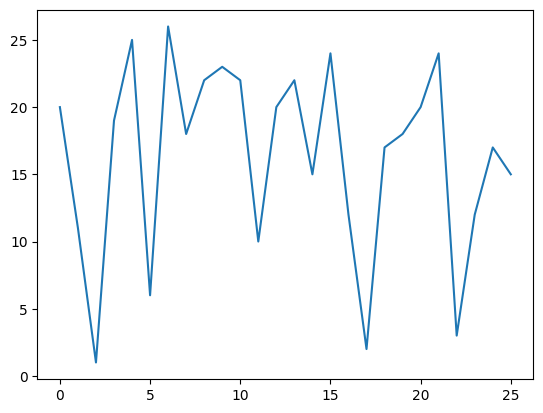

In [27]:
plt.plot(range(SIZE), random_sequence)
plt.show()

In [28]:
def deepest_lake(sequence) -> tuple[int, int, int]:
    #O(N)
    max_depth = 0
    max_boundaries = (0,0)

    left = 0
    smallest = sequence[0]

    for right in range(1,SIZE):
        right_val = sequence[right]
        left_val = sequence[left]

        if right_val>=left_val:
            depth = left_val-smallest
            if depth > max_depth:
                max_depth = depth
                max_boundaries = (left, right)
            left = right
            smallest = sequence[left]
            continue

        if right_val < left_val and right_val > smallest:
            depth = right_val-smallest
            if depth > max_depth:
                max_depth = depth
                max_boundaries = (left, right)

        if right_val < smallest:
            smallest = right_val
    return max_boundaries[0], max_boundaries[1], max_depth


In [29]:
def plot_results(sequence, left, right, depth):
    low_boundary = sequence[left]
    high_boundary = sequence[right]
    if sequence[right] < low_boundary:
        low_boundary = sequence[right]
        high_boundary = sequence[left]

    plt.plot(range(SIZE), sequence)
    plt.plot(range(left, right+1), sequence[left:right+1], color="red")
    plt.plot(range(SIZE), [low_boundary for _ in range(SIZE)], color="green", linestyle="dashed")
    plt.plot(range(SIZE), [low_boundary-depth for _ in range(SIZE)], color="green", linestyle="dashed")
    plt.text(-1, 0, 
            f"depth: {depth}\nlow_bound: {low_boundary}\nhigh_bound: {high_boundary}\nlowest_point: {low_boundary-depth}",
            fontsize=6)
    plt.show()

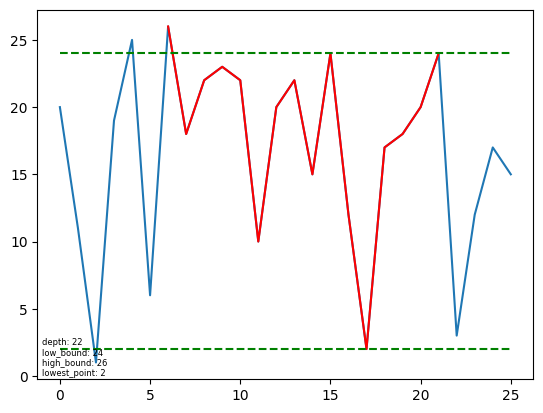

In [30]:
left, right, depth = deepest_lake(random_sequence)
plot_results(random_sequence, left, right, depth)